In [1]:
import os
#import sys
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt

#sys.path.append('../')
from data.load_data import *
from models.neural_networks import *
from train.train_cnn import *
from train.train_fcn import *
from train.train_semihebb import *
from evaluation.test import *
from utils.others import *
from utils.plot import *
from utils.save_model import *

# Model Performance Comparison on CIFAR10

50000
10000


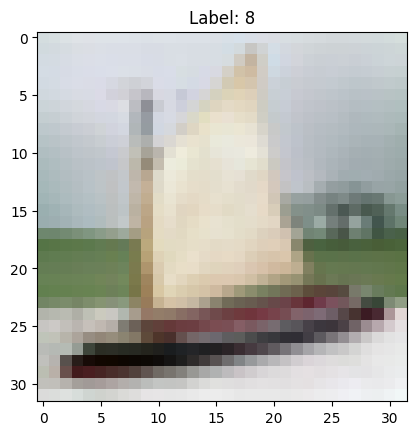

In [2]:
torch.manual_seed(1)    # reproducible

# Hyper Parameters
EPOCH = 1           
BATCH_SIZE = 50
LR = 0.001             
TSNE = False

#load CIFAR10 dataset
train_loader, test_loader = load_cifar10(BATCH_SIZE)
print(len(train_loader.dataset))
print(len(test_loader.dataset))

# Plot one example
plot_example(train_loader)

## Create Models

In [3]:
# 4+1
hebbnet = HebbNet([3072,1000,2000,4000,2000],lr=LR,require_hebb=True,activation=True,update_rule='gupta',p=60)
fcn = FCN([2000,10])

semihebbnet_4_1 = SemiHebbNet(hebbnet, fcn)

# 3+2
hebbnet = HebbNet([3072,1000,2000,4000],lr=LR,require_hebb=True,activation=True,update_rule='gupta',p=60)
fcn = FCN([4000,2000,10])

semihebbnet_3_2 = SemiHebbNet(hebbnet, fcn)

# 2+3
hebbnet = HebbNet([3072,1000,2000],lr=LR,require_hebb=True,activation=True,update_rule='gupta',p=60)
fcn = FCN([2000,4000,2000,10])

semihebbnet_2_3 = SemiHebbNet(hebbnet, fcn)

# 1+4
hebbnet = HebbNet([3072,1000],lr=LR,require_hebb=True,activation=True,update_rule='gupta',p=60)
fcn = FCN([1000,2000,4000,2000,10])

semihebbnet_1_4 = SemiHebbNet(hebbnet, fcn)

### Train models

In [4]:
models = [semihebbnet_4_1,semihebbnet_3_2,semihebbnet_2_3,semihebbnet_1_4]

for model in models:
    # optimizer and loss function
    optimizer = torch.optim.Adam(model.parameters(), lr=LR)  
    loss_func = nn.CrossEntropyLoss()                  

    # train networks
    train_semihebb(model=model, train_loader=train_loader, test_loader=test_loader, optimizer=optimizer, loss_func=loss_func, epochs=EPOCH, tsne_enabled=TSNE)    

Epoch: 0, Step: 0, Loss: 2.304744005203247, Accuracy: 15.04%
Epoch: 0, Step: 50, Loss: 2.276366710662842, Accuracy: 17.87%
Epoch: 0, Step: 100, Loss: 2.2585532665252686, Accuracy: 17.44%
Epoch: 0, Step: 150, Loss: 2.1666953563690186, Accuracy: 22.0%
Epoch: 0, Step: 200, Loss: 2.1832776069641113, Accuracy: 22.48%
Epoch: 0, Step: 250, Loss: 2.147976875305176, Accuracy: 21.98%
Epoch: 0, Step: 300, Loss: 2.186002492904663, Accuracy: 21.98%
Epoch: 0, Step: 350, Loss: 2.1231143474578857, Accuracy: 22.66%
Epoch: 0, Step: 400, Loss: 2.1426947116851807, Accuracy: 23.23%
Epoch: 0, Step: 450, Loss: 2.125525951385498, Accuracy: 24.24%
Epoch: 0, Step: 500, Loss: 2.223550319671631, Accuracy: 23.28%
Epoch: 0, Step: 550, Loss: 2.2471299171447754, Accuracy: 22.98%
Epoch: 0, Step: 600, Loss: 2.12363338470459, Accuracy: 23.7%
Epoch: 0, Step: 650, Loss: 2.06714129447937, Accuracy: 23.36%
Epoch: 0, Step: 700, Loss: 2.063706874847412, Accuracy: 23.94%
Epoch: 0, Step: 750, Loss: 2.214815139770508, Accuracy: 

Accuracy of the SemiHebbNet on the CIFAR10 test images: 25.88%
Accuracy of the SemiHebbNet on the CIFAR10 test images: 37.84%
Accuracy of the SemiHebbNet on the CIFAR10 test images: 36.43%
Accuracy of the SemiHebbNet on the CIFAR10 test images: 36.33%
[0.259, 0.378, 0.364, 0.363]
[0.8, 0.6, 0.4, 0.2]


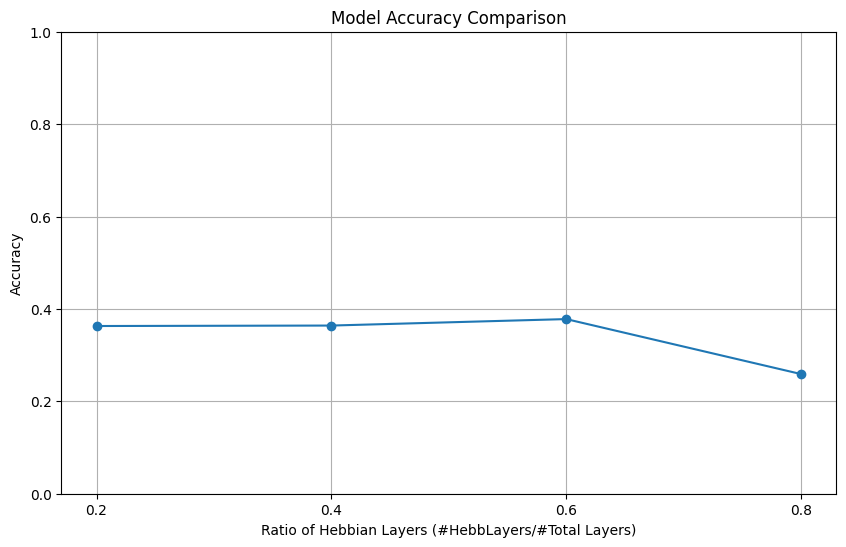

In [5]:
accuracies = []
for model in models:
        accuracies.append(test_accuracy(model=model,dataset='cifar10',flatten_input=True))


ratio = [0.8,0.6,0.4,0.2]
print(accuracies)
print(ratio)
plot_score_comparison(x_axis=ratio, accuracies=accuracies)

# Model Performance Comparison on MNIST

60000
10000


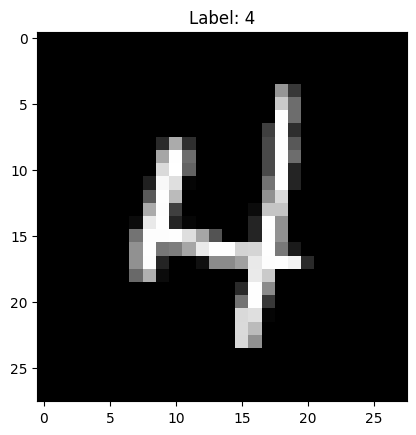

Epoch: 0, Step: 0, Loss: 2.2995643615722656, Accuracy: 10.6%
Epoch: 0, Step: 50, Loss: 2.2718663215637207, Accuracy: 19.44%
Epoch: 0, Step: 100, Loss: 2.2227914333343506, Accuracy: 26.72%
Epoch: 0, Step: 150, Loss: 2.191436529159546, Accuracy: 41.05%
Epoch: 0, Step: 200, Loss: 2.191976308822632, Accuracy: 39.56%
Epoch: 0, Step: 250, Loss: 2.1841495037078857, Accuracy: 43.32%
Epoch: 0, Step: 300, Loss: 2.1254942417144775, Accuracy: 56.88%
Epoch: 0, Step: 350, Loss: 2.076036214828491, Accuracy: 60.67%
Epoch: 0, Step: 400, Loss: 2.0466108322143555, Accuracy: 56.29%
Epoch: 0, Step: 450, Loss: 2.0913589000701904, Accuracy: 60.76%
Epoch: 0, Step: 500, Loss: 2.0160231590270996, Accuracy: 61.4%
Epoch: 0, Step: 550, Loss: 1.9680790901184082, Accuracy: 70.05%
Epoch: 0, Step: 600, Loss: 1.9326900243759155, Accuracy: 69.62%
Epoch: 0, Step: 650, Loss: 1.990989327430725, Accuracy: 65.93%
Epoch: 0, Step: 700, Loss: 1.9233160018920898, Accuracy: 66.65%
Epoch: 0, Step: 750, Loss: 1.8845852613449097, Ac

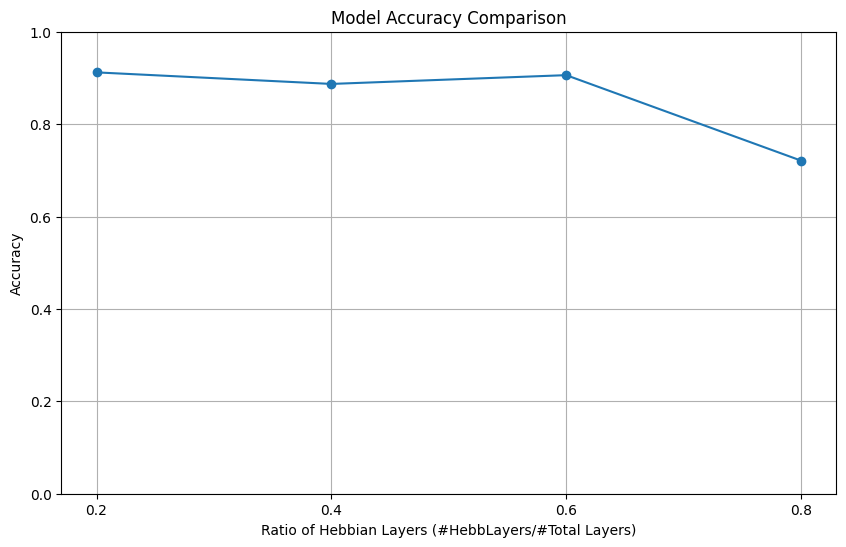

In [6]:
torch.manual_seed(1)    # reproducible

# Hyper Parameters
EPOCH = 1           
BATCH_SIZE = 50
LR = 0.001             
TSNE = False

#load MNIST dataset
train_loader, test_loader = load_mnist(BATCH_SIZE)
print(len(train_loader.dataset))
print(len(test_loader.dataset))

# Plot one example
plot_example(train_loader)

# 4+1
hebbnet = HebbNet([784,1000,2000,4000,2000],lr=LR,require_hebb=True,activation=True,update_rule='gupta',p=60)
fcn = FCN([2000,10])

semihebbnet_4_1 = SemiHebbNet(hebbnet, fcn)

# 3+2
hebbnet = HebbNet([784,1000,2000,4000],lr=LR,require_hebb=True,activation=True,update_rule='gupta',p=60)
fcn = FCN([4000,2000,10])

semihebbnet_3_2 = SemiHebbNet(hebbnet, fcn)

# 2+3
hebbnet = HebbNet([784,1000,2000],lr=LR,require_hebb=True,activation=True,update_rule='gupta',p=60)
fcn = FCN([2000,4000,2000,10])

semihebbnet_2_3 = SemiHebbNet(hebbnet, fcn)

# 1+4
hebbnet = HebbNet([784,1000],lr=LR,require_hebb=True,activation=True,update_rule='gupta',p=60)
fcn = FCN([1000,2000,4000,2000,10])

semihebbnet_1_4 = SemiHebbNet(hebbnet, fcn)

models = [semihebbnet_4_1,semihebbnet_3_2,semihebbnet_2_3,semihebbnet_1_4]

for model in models:
    # optimizer and loss function
    optimizer = torch.optim.Adam(model.parameters(), lr=LR)  
    loss_func = nn.CrossEntropyLoss()                  

    # train networks
    train_semihebb(model=model, train_loader=train_loader, test_loader=test_loader, optimizer=optimizer, loss_func=loss_func, epochs=EPOCH, tsne_enabled=TSNE) 

accuracies = []
for model in models:
        accuracies.append(test_accuracy(model=model,dataset='mnist',flatten_input=True))


ratio = [0.8,0.6,0.4,0.2]
print(accuracies)
print(ratio)
plot_score_comparison(x_axis=ratio, accuracies=accuracies) 